# Projeto-12-remoção-de-ruidos-de-imagens

In [82]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import random

In [83]:
from tensorflow.keras.datasets import fashion_mnist

In [84]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

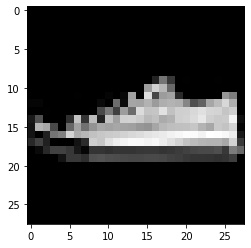

In [85]:
i = random.randint(0,60000)
plt.imshow( X_train[i] , cmap = 'gray')

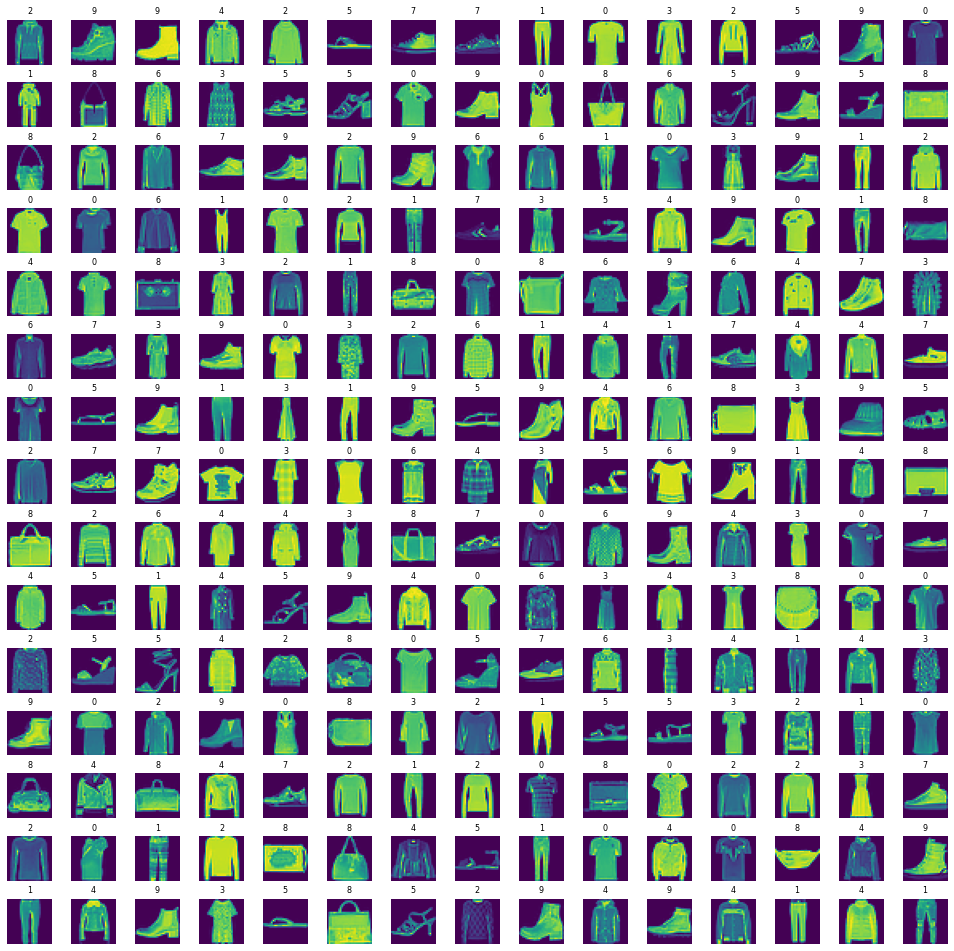

In [86]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Adicionar Ruido nas imagens

In [87]:
X_train, X_test = X_train / 255, X_test / 255

In [88]:
add_noise = np.random.randn(*(28,28))
add_noise.shape

(28, 28)

In [89]:
noise_factor = 0.3
add_noise = noise_factor * np.random.randn(*(28,28))

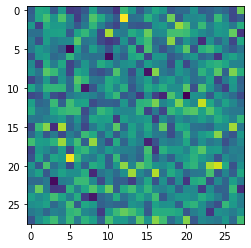

In [90]:
plt.imshow(add_noise)

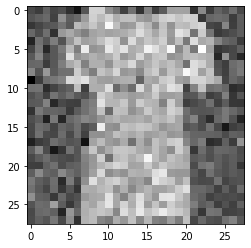

In [91]:
noise_factor = 0.2
sample_img = X_train[10] 
noisy_sample_img = sample_img + noise_factor * np.random.randn(*(28,28))
plt.imshow(noisy_sample_img, cmap='gray')

In [92]:
np.max(noisy_sample_img), np.min(noisy_sample_img)

(1.2501715870011152, -0.6590024363346851)

In [93]:
#converter para valores entre 0 e 1
noisy_sample_img = np.clip(noisy_sample_img, 0., 1.)
np.max(noisy_sample_img), np.min(noisy_sample_img)


(1.0, 0.0)

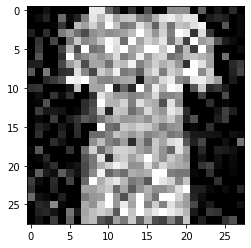

In [94]:
plt.imshow(noisy_sample_img, cmap='gray')

In [95]:
#Colocando ruidos na Base de dados
X_train_noisy = []
noise_factor = 0.75

for sample_img in X_train:
    sample_img_noisy = sample_img + noise_factor * np.random.randn(*(28,28))
    sample_img_noisy = np.clip(sample_img_noisy, 0., 1.)
    X_train_noisy.append(sample_img_noisy)
    
X_train_noisy = np.array(X_train_noisy)

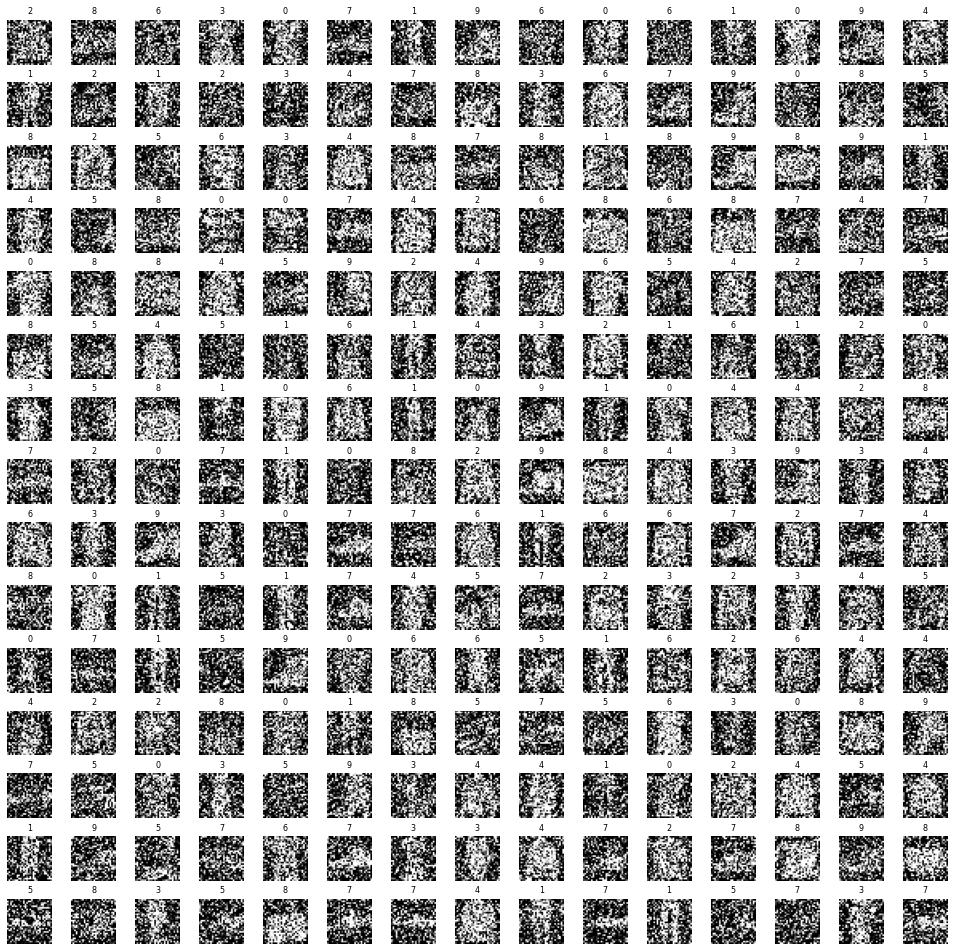

In [96]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train_noisy[index], cmap='gray')
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [107]:
#Colocando ruidos na Base de dados de Teste
X_test_noisy = []
noise_factor = 0.5

for sample_img in X_test:
    sample_img_noisy = sample_img + noise_factor * np.random.randn(*(28,28))
    sample_img_noisy = np.clip(sample_img_noisy, 0., 1.)
    X_test_noisy.append(sample_img_noisy)
    
X_test_noisy = np.array(X_test_noisy)

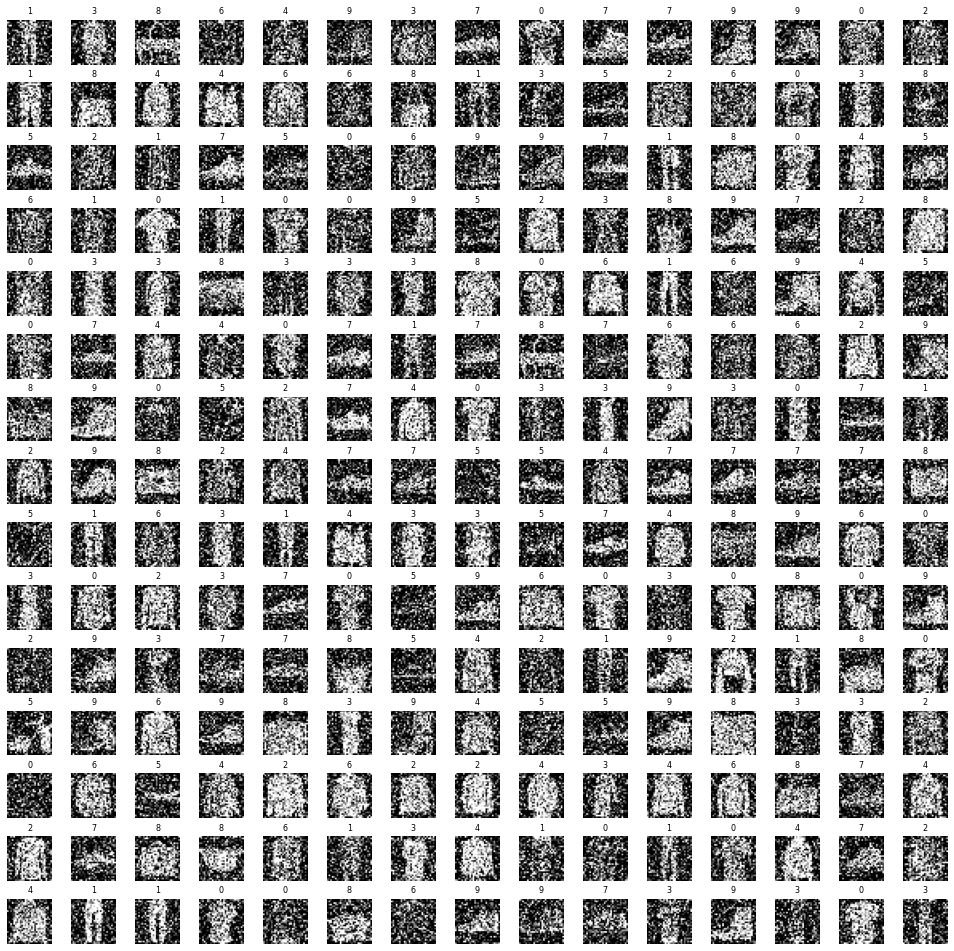

In [108]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(X_test_noisy)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_test_noisy[index], cmap='gray')
    axes[i].set_title(y_test[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Criação do modelo

In [109]:
autoencoder = tf.keras.Sequential()

# Encoder 
autoencoder.add(tf.keras.layers.Conv2D(16, #numero de filtros
                                      (3,3), #Tamanho dos Filtros 
                                      strides=1, #Deslocamento  dos filtros
                                      padding='same', 
                                      input_shape=(28,28,1)))

autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), #Tamanho do filtro
                                             padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2),padding='same'))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))


#Decoder image
autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8, (3,3), strides=1, padding='same'))

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, padding='same', activation='sigmoid'))

autoencoder.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 8)        

In [110]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

In [113]:
hist = autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1), 
                X_train.reshape(-1, 28, 28, 1),
                epochs=50,
                batch_size=200)

Epoch 1/50
300/300 [==============================] - 11s 36ms/step - loss: 0.4274
Epoch 2/50
300/300 [==============================] - 11s 36ms/step - loss: 0.3629
Epoch 3/50
300/300 [==============================] - 11s 35ms/step - loss: 0.3551
Epoch 4/50
300/300 [==============================] - 11s 35ms/step - loss: 0.3516
Epoch 5/50
300/300 [==============================] - 11s 35ms/step - loss: 0.3494
Epoch 6/50
300/300 [==============================] - 11s 35ms/step - loss: 0.3480
Epoch 7/50
300/300 [==============================] - 11s 36ms/step - loss: 0.3468
Epoch 8/50
300/300 [==============================] - 11s 36ms/step - loss: 0.3458
Epoch 9/50
300/300 [==============================] - 11s 36ms/step - loss: 0.3449
Epoch 10/50
300/300 [==============================] - 11s 37ms/step - loss: 0.3442
Epoch 11/50
300/300 [==============================] - 11s 37ms/step - loss: 0.3437
Epoch 12/50
300/300 [==============================] - 11s 37ms/step - loss: 0.3432
E

### Avaliação do Modelo

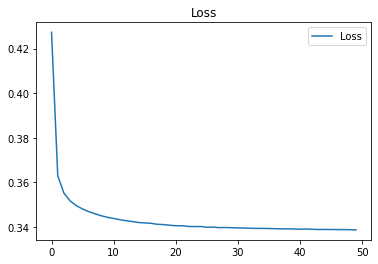

In [119]:
plt.plot(hist.history["loss"], label='Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [122]:
denoised_images = autoencoder.predict(X_test_noisy[25:40].reshape(-1, 28,28, 1))
denoised_images.shape

(15, 28, 28, 1)

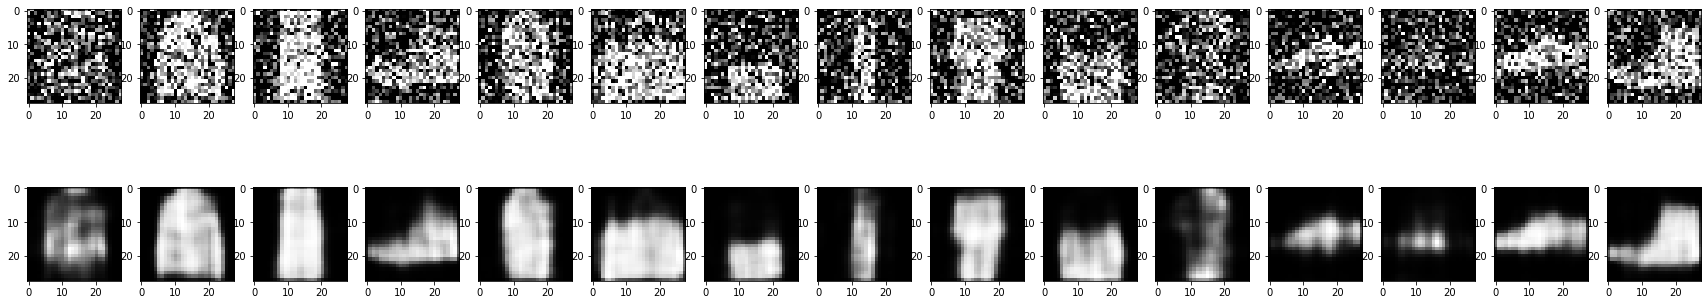

In [123]:
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[25:40], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)), cmap='gray')